## Face Detection and Recognition with Keras

For this tutorial, I used a pre-trained MTCNN model in Keras to detect faces in images. Once we’ve extracted the faces from an image, we’ll compute a similarity score between these faces to find if they belong to the same person.

## Installing and importing packages

Before you start with detecting and recognizing faces, you need to set up your development environment. First, you need to “read” images through Python before doing any processing on them. We’ll use the plotting library matplotlib to read and manipulate images. Install the latest version through the installer pip:

To use any implementation of a CNN algorithm, you need to install keras. Download and install the latest version using the command below:

"pip3 install keras"

Find more documentation of Keras package following this [link](https://keras.io/)

We will follow these steps to implement the face detention algorithm on images downloaded from the internet, and I will use the ones from people who are in trending topic for any reason and football because I love it!!


### Step 1: Face Detection with the MTCNN Model
The objectives in this step are as follows:

#### 1.1 Retrieve images hosted externally to a local server.
For this purpose, we’ll make two imports — matplotlib for reading images, and mtcnn for detecting faces within the images.

#### 1.2 Read images through matplotlib‘s imread() function
Now that we’ve successfully detected a face, let’s draw a rectangle over it to highlight the face within the image to verify if the detection was correct.

To draw a rectangle, import the Rectangle object from matplotlib.patches

#### 1.3 Detect and explore faces through the MTCNN algorithm

#### 1.4 Extract faces from an image
At this point, you know the coordinates of the faces from the detector. Extracting the faces is a fairly easy task using list indices. However, the VGGFace2 algorithm that we use needs the faces to be resized to 224 x 224 pixels. We’ll use the PIL library to resize the images.

### Step 2: Face Recognition with VGGFace2 Model

#### 2.1 Compare Two Faces

#### 2.2 Compare Multiple Faces in Two Images

### Detecting Faces in an Image.

For this purpose, we’ll make two imports — matplotlib for reading images, and **MTCNN** for detecting faces within the images. I have already downloaded the images I wanted to work with and installed them in the same directory where this notebook is located.

In [1]:
from matplotlib import pyplot as plt #Plots the images
from mtcnn.mtcnn import MTCNN #Detects faces in images 

image = plt.imread('Trump1.jpg')

Using TensorFlow backend.
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SG0306972\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

Next, initialize an MTCNN() object into the detector variable and use the .detect_faces() method to detect the faces in an image. Let’s see what it returns:

In [2]:
# initializes an MTCNN() object into the detector variable and use the .detect_faces() method 
# to detect the faces in an image

detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

Instructions for updating:
Colocations handled automatically by placer.
{'box': [134, 17, 43, 56], 'confidence': 0.999943733215332, 'keypoints': {'left_eye': (145, 39), 'right_eye': (163, 38), 'nose': (154, 50), 'mouth_left': (148, 62), 'mouth_right': (164, 61)}}


For every face, a Python dictionary is returned, which contains three keys. The box key contains the boundary of the face within the image. It has four values: x- and y- coordinates of the top left vertex, width, and height of the rectangle containing the face. The other keys are confidence and keypoints. The keypoints key contains a dictionary containing the features of a face that were detected, along with their coordinates:"

### Highlighting Faces in an Image

Let’s define a function highlight_faces to first display the image and then draw rectangles over faces that were detected. First, read the image through imread() and plot it through imshow(). For each face that was detected, draw a rectangle using the Rectangle() class.

Finally, display the image and the rectangles using the .show() method. If you’re using Jupyter notebooks, you may use the _%matplotlib_ inline magic command to show plots inline:

In [3]:
from matplotlib.patches import Rectangle   #Highlights Faces in an Image

#Function to highlight faces detected in images into the image_path
def highlight_faces(image_path, faces):
  # displays images
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

In the first image analyzed, our friend USA President is very happy and satisfied after sending a tweet where he informed the raise of exportation tariffs to China.

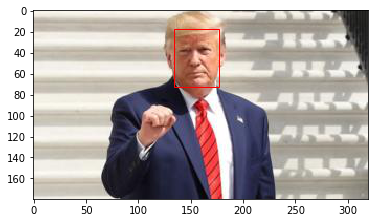

In [4]:
highlight_faces('Trump1.jpg', faces)

In this second images, he looks victorious after dedicating all of the time of his speech in World Economic Forum in Davos to exalt his Government economic policies.

Let's see how both images are detected by MTCNN algorithm.

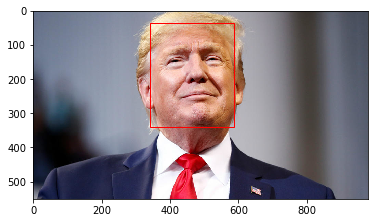

In [5]:
image = plt.imread('Trump2.jpg')
faces = detector.detect_faces(image)

highlight_faces('Trump2.jpg', faces)

In these two images, you can see that the MTCNN algorithm correctly detects faces. Let’s now extract this face from the image to perform further analysis on it.

### Extract Face for Further Analysis

At this point, you know the coordinates of the faces from the detector. Extracting the faces is a fairly easy task using list indices. However, the VGGFace2 algorithm that we use needs the faces to be resized to 224 x 224 pixels. We’ll use the PIL library to resize the images.

In this step we'll define a function called *extract_face_from_image()*, which extracts all faces from an image:

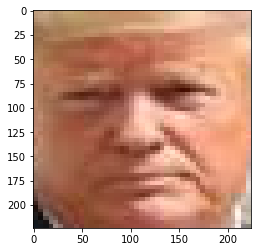

In [6]:
from numpy import asarray
from PIL import Image

#This Function extracts all faces from an image                             
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)
    
    #images dictionary
    face_images = []
    #iterates over the faces in images
    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image('Trump1.jpg')

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

### Step 2: Face Recognition with VGGFace2 Model

In this section, let’s first test the model on the two images of Lee Iacocca that we’ve retrieved. Then, we’ll move on to compare faces from images of the starting eleven of the Chelsea football team in 2018 and 2019. You’ll then be able to assess if the algorithm identifies faces of common players between the images.

#### Comparing Multiple Faces in Two Images


In this section, you need to import three modules: **VGGFace** to prepare the extracted faces to be used in the face recognition models, and the **cosine** function from SciPy to compute the distance between two faces.

Since the model scores for each face are vectors, we need to find the similarity between the scores of two faces. We can typically use a [Euclidean or Cosine function](https://en.wikipedia.org/wiki/Cosine_similarity) to calculate the similarity.

Vector representation of faces are suited to the cosine similarity. Here’s a detailed comparison between [Euclidean and Cosine function](https://www.machinelearningplus.com/nlp/cosine-similarity/) distances with an example.

I will compare the faces in two images of starting elevens of the Leicester City Football Club in a Champios League match vs Sevilla in the 2016–17 season and FA Cup match in the 2015–16 season, when they were Premier League champions. 

While several of the players feature in both match day squads, let’s see if the algorithm is able to detect all common players. Needless to say, that I am a big Leicester City fan, it was amazing how this guys reached the Premier League throphy, having a bunch of Teams with triple of their budget on that campaign. 

In order to start analyzing both images, we'll define a function that takes the extracted faces as inputs and returns the computed model scores. The model returns a vector, which represents the features of a face.


In [7]:
#Importing required packages
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

#function that takes the extracted faces 
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

First, let’s retrieve the images that we have stored in our local directory, and we'll see if the algorith detects the faces in each image and highlight them.

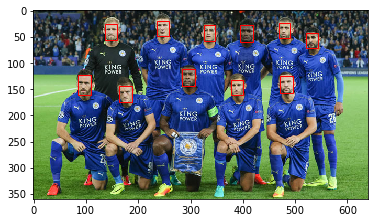

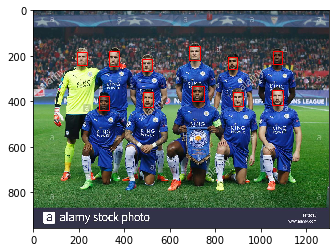

In [8]:
image = plt.imread('leicester1.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('leicester1.jpg', faces_staring_xi)

image = plt.imread('leicester2.jpg')
faces = detector.detect_faces(image)
highlight_faces('leicester2.jpg', faces)

Before we proceed further, here are the starting elevens from both matches:

**Sevilla Match Starting XI:** Schmeichel, Morgan, Huth, Simpson, Fuchs, Drinkwater, Ndidi, Musa, Mahrez, Albrighton, Vardy.

**FA Cup Match Starting XI:** Hamer, Morgan, Huth, Amartey, Fuchs, Drinkwater, De Laet, James, Mahrez, Albrighton, Vardy.

We have seven players who are common to both starting XIs and who ideally should be matched by the algorithm.

Let’s first compute scores:

Let's start storing the images locally for our analysis, from local files. Let’s define a function store_image for this purpose:

1 10 0.2808757424354553


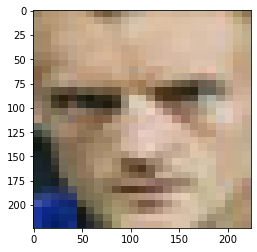

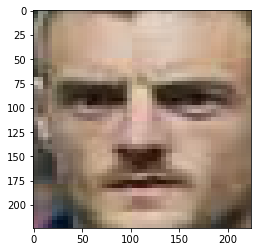

2 8 0.3352649211883545


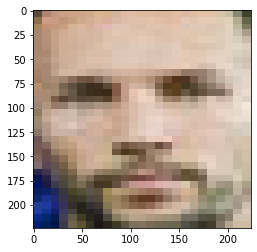

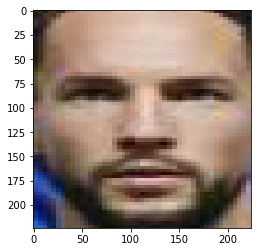

3 0 0.37879234552383423


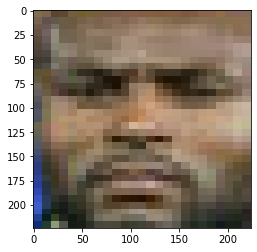

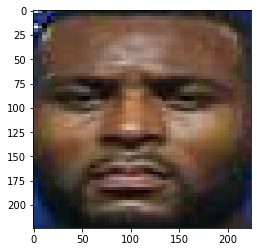

4 4 0.21177923679351807


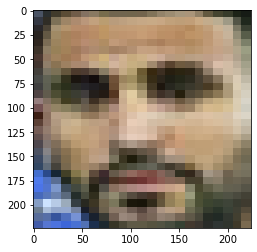

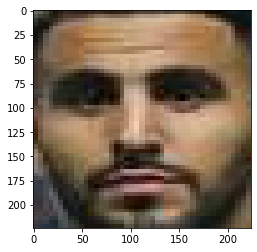

7 9 0.24492228031158447


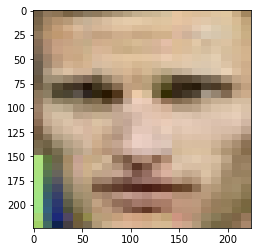

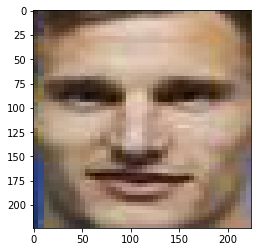

8 7 0.21353894472122192


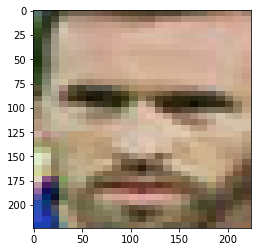

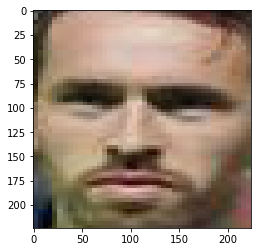

9 3 0.2945372462272644


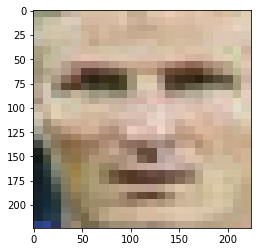

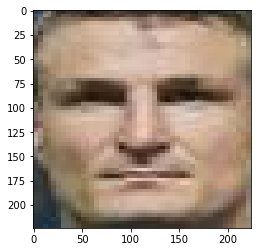

In [9]:
sevilla_faces = extract_face_from_image('leicester1.jpg')
FaCup_faces = extract_face_from_image('leicester2.jpg')

model_scores_starting_xi_sevilla = get_model_scores(sevilla_faces)
model_scores_starting_xi_FaCup = get_model_scores(FaCup_faces)

for idx, face_score_1 in enumerate(model_scores_starting_xi_sevilla):
  for idy, face_score_2 in enumerate(model_scores_starting_xi_FaCup):
    score = cosine(face_score_1, face_score_2)
    if score <= 0.4:
      # Printing the IDs of faces and score
      print(idx, idy, score)
      # Displaying each matched pair of faces
      plt.imshow(sevilla_faces[idx])
      plt.show()
      plt.imshow(FaCup_faces[idy])
      plt.show()
    


Here’s the list of pairs of faces that the algorithm matched. Notice that it has been able to match all seven pairs of faces.

In this tutorial, we first detected faces in images using the [MTCNN model](https://towardsdatascience.com/mtcnn-face-detection-cdcb20448ce0) and highlighted them in the images to determine if the model worked correctly. Next, we used the [VGGFace2 algorithm](https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/) to extract features from faces in the form of a vector and matched different faces to group them together.

Notice how I have deliberately used photos of starting elevens as players are staring right into the camera! You can try matching the starting eleven faces with those of a trophy celebration and I’m pretty sure the accuracy would drop.